In [1]:
%load_ext autoreload

In [2]:
import logging 
from pathlib import Path

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial import Delaunay

from sklearn.cluster import KMeans


%autoreload 2
from alpha_clustering.alpha_shape import AlphaShape, AlphaShape2D, AlphaShape3D, AlphaShapeND
from alpha_clustering.cluster import Cluster
from alpha_clustering.plot import Plot
from alpha_clustering.io_handler import IOHandler

alpha_shape_logger = logging.getLogger("alpha_shape")
alpha_shape_logger.setLevel(logging.INFO)

cluster_logger = logging.getLogger("cluster")
cluster_logger.setLevel(logging.INFO)

plt.rcParams["axes.edgecolor"] = (0.33, 0.32, 0.29)
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["xtick.color"] = (0.33, 0.32, 0.29)
plt.rcParams["ytick.color"] = (0.33, 0.32, 0.29)

In [3]:
io_handler = IOHandler(
    Path("data/points"),
    Path("../master_seminar_presentation/res")
)

In [6]:
data_random_1 = io_handler.load_point_cloud("random-1.csv")
complex_9 = io_handler.load_point_cloud("complex9.arff")
aggregation = io_handler.load_point_cloud("aggregation.arff")
d2_20c_no0 = io_handler.load_point_cloud("2d-20c-no0.arff")
st_900 = io_handler.load_point_cloud("st900-2-9.arff")
spectral = io_handler.load_point_cloud("spectral.arff")
test = io_handler.load_point_cloud("test.arff")
test_2 = io_handler.load_point_cloud("test_2.arff")
test_3 = io_handler.load_point_cloud("test_3.arff")
bio_protein = io_handler.load_point_cloud("bio-protein.arff")
hypercube = io_handler.load_point_cloud("hypercube.arff")
chainlink = io_handler.load_point_cloud("chainlink.arff")
golf_ball = io_handler.load_point_cloud("golf-ball.arff")
tesseract = io_handler.load_point_cloud("tesseract.arff")
hepta = io_handler.load_point_cloud("hepta.arff")

tls_20190624_1a = pd.read_csv("~/Downloads/Hochebenkar_TLS_20190624/20190624_region_1a_normals.xyz", sep = "\t", header = None)

INFO 	 21-11-22 09:48:15 Loading point cloud 'random-1.csv' from 'data/points'.
INFO 	 21-11-22 09:48:15 Loading point cloud 'complex9.arff' from 'data/points'.
INFO 	 21-11-22 09:48:15 Loading point cloud 'aggregation.arff' from 'data/points'.
INFO 	 21-11-22 09:48:15 Loading point cloud '2d-20c-no0.arff' from 'data/points'.
INFO 	 21-11-22 09:48:15 Loading point cloud 'st900-2-9.arff' from 'data/points'.
INFO 	 21-11-22 09:48:15 Loading point cloud 'spectral.arff' from 'data/points'.
INFO 	 21-11-22 09:48:15 Loading point cloud 'test.arff' from 'data/points'.
INFO 	 21-11-22 09:48:15 Loading point cloud 'test_2.arff' from 'data/points'.
INFO 	 21-11-22 09:48:15 Loading point cloud 'test_3.arff' from 'data/points'.
INFO 	 21-11-22 09:48:15 Loading point cloud 'bio-protein.arff' from 'data/points'.
INFO 	 21-11-22 09:48:16 Loading point cloud 'hypercube.arff' from 'data/points'.
INFO 	 21-11-22 09:48:16 Loading point cloud 'chainlink.arff' from 'data/points'.
INFO 	 21-11-22 09:48:16 L

In [7]:
def find_alpha(ac: AlphaShape, n_true_clusters: int, a: float, b: float, step: float = None) -> float:
    if step is None:
        step = 1e-3
    print(f" Finding alpha for {n_true_clusters} ".center(100, "="))
    alpha = 0.000
    while a <= b:
        alpha = (a + b) / 2.
        ac.predict(alpha)
        clustering = Cluster(ac.get_shape)
        clustering.fit()
        n_clusters = len(clustering.predict())
        if n_clusters > n_true_clusters:
            b = alpha - step
        elif n_clusters < n_true_clusters:
            a = alpha + step
        else:
            break
    return alpha, clustering.predict()

INFO 	 09-11-22 11:07:34 Finding the α-shape for given point set with α = -0.00255...
INFO 	 09-11-22 11:07:34 α-shape with 11121 simplices generated.
INFO 	 09-11-22 11:07:34 Fitting the cluster model...
INFO 	 09-11-22 11:07:34 Fitting the cluster model...
INFO 	 09-11-22 11:07:34 Visualizing α-shape...
INFO 	 09-11-22 11:07:34 Predicting the clusters using the α-shape...
INFO 	 09-11-22 11:07:34 Predicting the clusters using the α-shape...
INFO 	 09-11-22 11:07:34 Visualizing clusters...


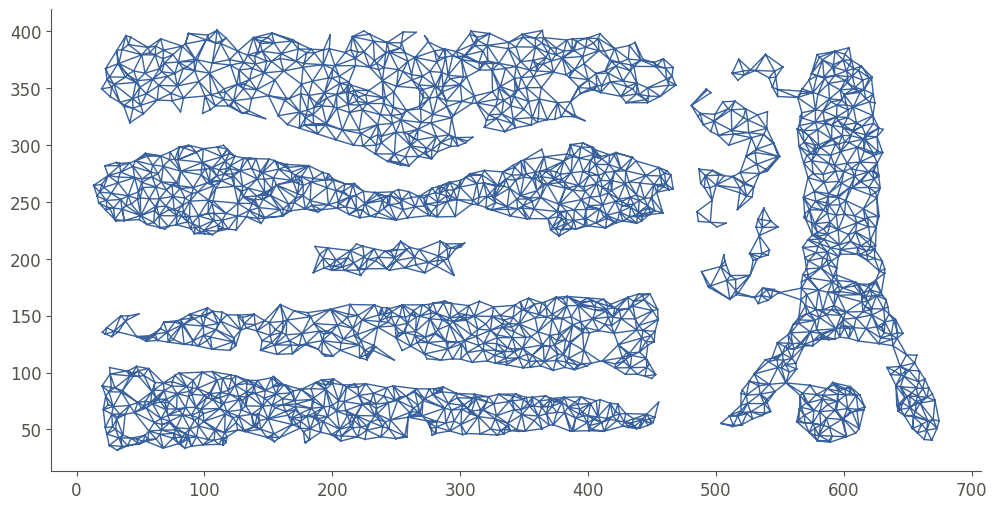

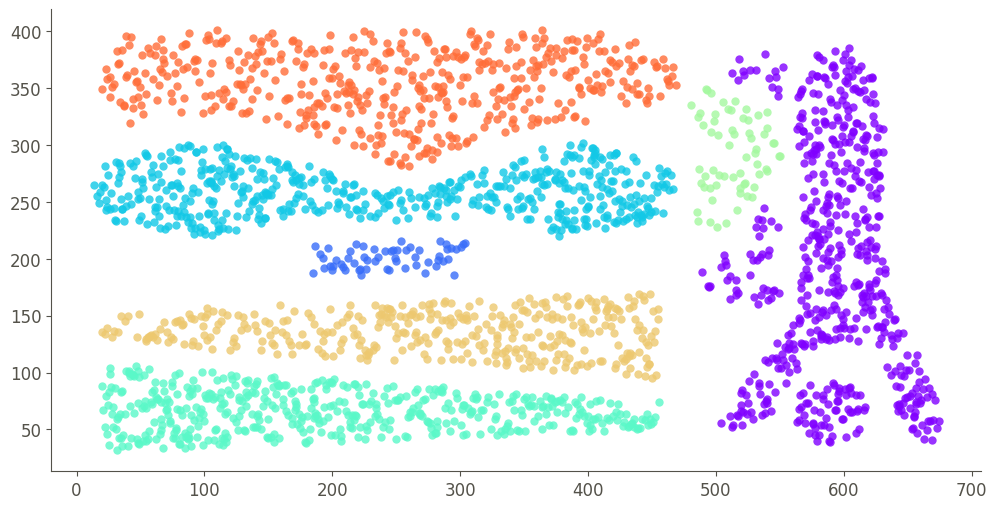

In [66]:
dataset = test_2
n_true_clusters = len(np.unique(dataset.iloc[:, -1].to_numpy()))
points = dataset.iloc[:, : -1].to_numpy()
ac = AlphaShape2D(points)
# alpha, clusters = find_alpha(ac, -0.001, 0.000, 0.00001, n_true_clusters)
ac.predict(-0.00255)
clustering = Cluster(ac.get_shape)
clustering.fit()

plot = Plot(vertices = points)
fig = plot.alpha_shape(ac.get_shape, points_q = False, figsize = (12, 6))
fig = plot.clusters(clustering.predict(), figsize = (12, 6))

INFO 	 09-11-22 11:09:57 Constructed the delaunay triangulation with furthest_site = False and 1212 simplices.
INFO 	 09-11-22 11:09:57 Constructed the delaunay triangulation with furthest_site = False and 1212 simplices.
INFO 	 09-11-22 11:09:57 α-shape with 1220 simplices generated.
INFO 	 09-11-22 11:09:57 α-shape with 1220 simplices generated.
INFO 	 09-11-22 11:09:57 Fitting the cluster model...
INFO 	 09-11-22 11:09:57 Fitting the cluster model...
INFO 	 09-11-22 11:09:57 Predicting the clusters using the α-shape...
INFO 	 09-11-22 11:09:57 Predicting the clusters using the α-shape...
INFO 	 09-11-22 11:09:57 Constructed the delaunay triangulation with furthest_site = False and 1212 simplices.
INFO 	 09-11-22 11:09:57 Constructed the delaunay triangulation with furthest_site = False and 1212 simplices.
INFO 	 09-11-22 11:09:57 α-shape with 2408 simplices generated.
INFO 	 09-11-22 11:09:57 α-shape with 2408 simplices generated.
INFO 	 09-11-22 11:09:57 Fitting the cluster model..

======================================= Finding alpha for 7 ========================================


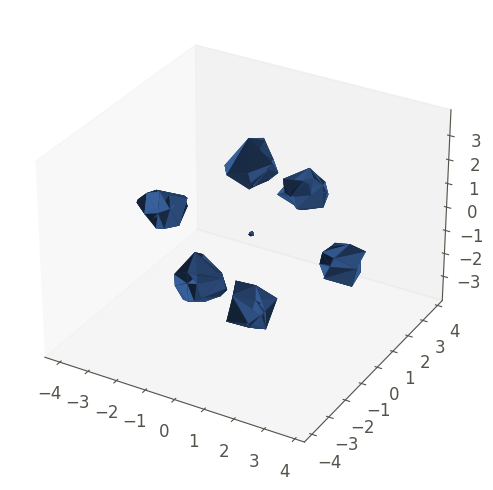

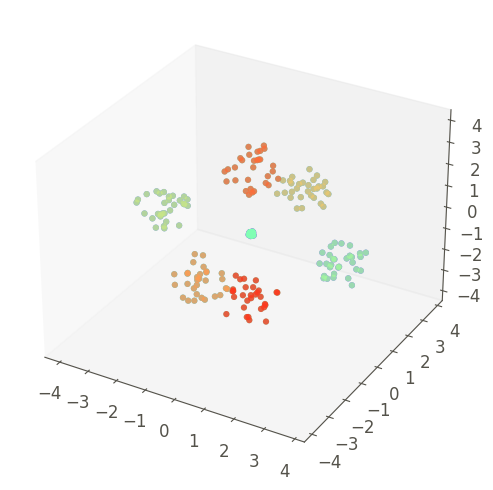

In [74]:
dataset = hepta
n_true_clusters = len(np.unique(dataset.iloc[:, -1].to_numpy()))
points = dataset.iloc[:, : -1].to_numpy()
ac = AlphaShape3D(points)
ac.fit()
alpha, clusters = find_alpha(ac, 0.0001, 5.00, 0.01, n_true_clusters)
# clustering = Cluster(ac.get_shape)
# clustering.fit()

plot = Plot(vertices = points)
fig = plot.alpha_shape(ac.get_shape, points_q = False, figsize = (12, 6))
fig = plot.clusters(clusters, figsize = (12, 6))

In [ ]:
ac1 = AlphaShape2D(data_random_1.to_numpy(), -0.004)
ac1.fit()

ac2 = AlphaShape2D(data_random_1.to_numpy(), 0.0)
ac2.fit()

ac3 = AlphaShape2D(data_random_1.to_numpy(), 0.1)
ac3.fit()

plot = Plot(vertices = data_random_1.to_numpy()) 
fig1 = plot.alpha_shape(ac1.get_shape)
fig2, ax = plt.subplots(figsize = (16, 9), dpi = 300)
edges = ac2.get_shape[1]
ax.scatter(data_random_1.iloc[:, 0], data_random_1.iloc[:, 1], color = sns.color_palette("mako", 50)[30], alpha = 0.8)
for edge in edges:
    ax.plot(
        data_random_1.to_numpy()[edge, 0],
        data_random_1.to_numpy()[edge, 1],
        color = sns.color_palette("mako", 50)[20],
        linewidth = 1.0
    )
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig3 = plot.alpha_shape(ac3.get_shape)


In [ ]:
io_handler.write_figs(
    "random-1", 
    [fig1, fig2, fig3], 
    ["alpha_shape_1.png", "alpha_shape_2.png", "alpha_shape_3.png"]
)

INFO 	 04-11-22 09:58:43 Writing figure 'alpha_shape_1.png' to '../master_seminar_presentation/res/figs/random-1-figures'.
INFO 	 04-11-22 09:58:44 Writing figure 'alpha_shape_2.png' to '../master_seminar_presentation/res/figs/random-1-figures'.
INFO 	 04-11-22 09:58:46 Writing figure 'alpha_shape_3.png' to '../master_seminar_presentation/res/figs/random-1-figures'.


INFO 	 15-11-22 14:50:29 Constructed the delaunay triangulation with furthest_site = False and 1212 simplices.
INFO 	 15-11-22 14:50:29 α-shape with 1476 simplices generated.
INFO 	 15-11-22 14:50:29 Fitting the cluster model...
INFO 	 15-11-22 14:50:29 Predicting the clusters using the α-shape...
INFO 	 15-11-22 14:50:29 α-shape with 3037 simplices generated.
INFO 	 15-11-22 14:50:29 Fitting the cluster model...
INFO 	 15-11-22 14:50:29 Predicting the clusters using the α-shape...
INFO 	 15-11-22 14:50:29 Predicting the clusters using the α-shape...
INFO 	 15-11-22 14:50:29 Visualizing α-shape...


Number of true clusters: 7
======================================= Finding alpha for 7 ========================================
Found alpha = 1.24995


INFO 	 15-11-22 14:50:29 Visualizing clusters...


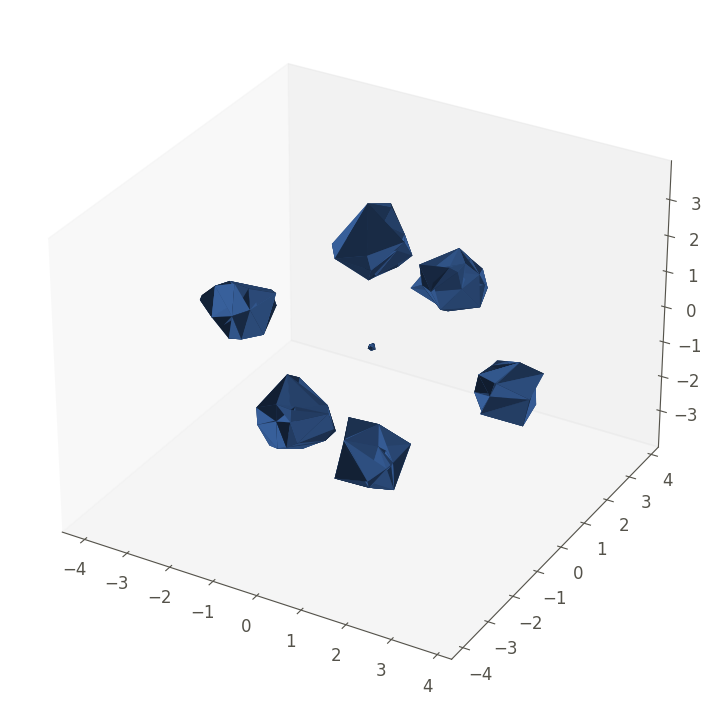

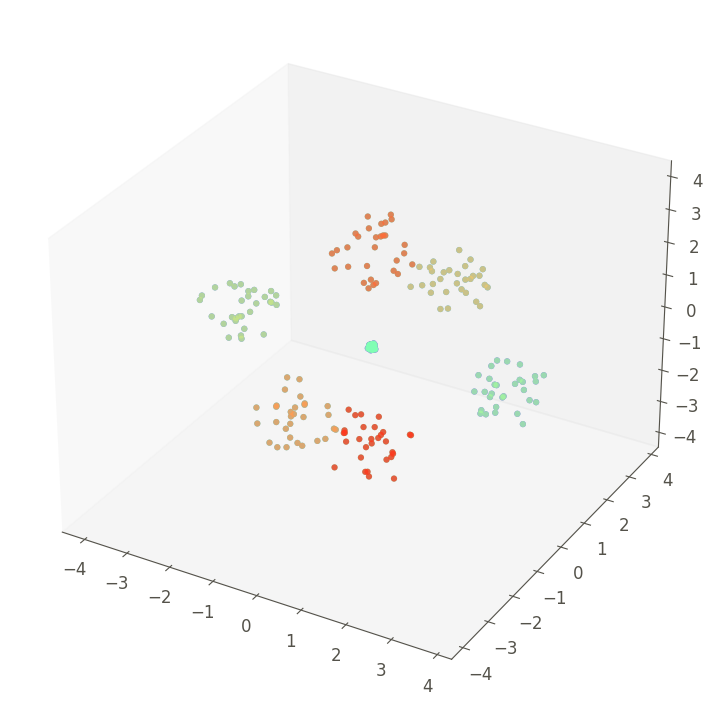

In [68]:
dataset = hepta
# dataset_name: str = "aggregation"
points = dataset.iloc[:, : -1].to_numpy()
# Create a regular tetrahedron
# points = np.array(
#     [[1, 0, 0], [1, 0, 1], [1, 1, 1], [0, 0, 1]],
#     dtype = np.float32
# )
# fig, ax = plt.subplots(figsize = (16, 9))
# ax.scatter(
#     *points.T,
#     alpha = 0.8,
#     linewidth= 0.8,
#     color = sns.color_palette("mako", 50)[30]
# )
# ax.spines["right"].set_visible(False)
# ax.spines["top"].set_visible(False)
# fig.savefig(
#     Path("../diss").resolve() / "thesis" / "res" / f"test_2_scatter.png",
#     bbox_inches = "tight"
# )
n_true_clusters = len(np.unique(dataset.iloc[:, -1]))
# n_true_clusters = 4
print(f"Number of true clusters: {n_true_clusters}")
# n_true_clusters = 1
ac_nd = AlphaShapeND(points)
ac_nd.fit()
# ac_nd.predict(0.005)
precision = 1e-4
a = 0 
b = 5
step = 1 * precision
alpha, clusters = find_alpha(ac_nd, n_true_clusters, a, b, step)
print(f"Found {alpha = }")
plot = Plot(vertices = points)
fig_1 = plot.alpha_shape(ac_nd.get_shape, figsize = (16, 9), points_q = False)
fig_2 = plot.clusters(clusters, figsize = (16, 9))

# fig_1.savefig(
#     Path("../diss").resolve() / "thesis" / "res" / f"{dataset_name}_found_alpha_1.png",
#     bbox_inches = "tight"
# )

# fig_2.savefig(
#     Path("../diss").resolve() / "thesis" / "res" / f"{dataset_name}_found_alpha_clusters_1.png",
#     bbox_inches = "tight"
# )



# TLS DATA

In [11]:
tls_data = tls_20190624_1a
tls_point_cloud = tls_data.iloc[:, : 3].to_numpy()

In [12]:
tls_ac = AlphaShapeND(tls_point_cloud)
tls_ac.fit()
tls_ac.predict(3.00)

# tls_clustering = Cluster(tls_ac.get_shape)
# tls_clustering.fit()

# plot = Plot(vertices = tls_point_cloud)
# fig = plot.alpha_shape(tls_ac.get_shape, figsize = (12, 6), points_q = False)
# fig = plot.clusters(tls_clustering.predict(), figsize = (12, 6))

INFO 	 21-11-22 10:38:14 Constructed the delaunay triangulation with furthest_site = False and 23405 simplices.
INFO 	 21-11-22 10:38:17 α-shape with 198 simplices generated.
